This notebook is for the evaluation of algorithm in machine learning course at ISAE-SUPAERO, written by Ziqing WU.


<div style="font-size:22pt; line-height:25pt; font-weight:bold; text-align:center;">Extremely Randomized Trees</div>


0. [Preliminary - Brief recall of decision tree and bagging](#sec0) 
1. [Introduction](#sec1)
2. [Algorithm](#sec2)
3. [Illustrations](#sec3)
4. [Examples](#sec4)
    1. [Spam or ham?](#sec4-1)
    2. [NIST](#sec4-2)
5. [A little bit of theory](#sec5)

# <a id="sec0"></a> 0. Preliminary - Brief recall of decision tree and bagging
The extremely randomized trees is a tree-based ensemble method of supervised classification and regression problems.

To get a thourough understanding of this method, the knowledge of decision tree and bagging that we have covered in class is necessary. In this section, a brief recall of these two concepts is provided. You may skip it if you feel completely comfortable with decision trees and bagging idea. 

## 0.1 Decision Tree

Decision Tree is the hierarchical description of data based on logical (binary) questions. Based on the decision tree, several algorithms are proposed to solve classification or regression problems. They are greedy, top-down, recursive, partitioning. Here CART (Classification And Regression Trees) algorithm for classification is taken as an example. [[Rutkowski, 2014](https://www.sciencedirect.com/science/article/pii/S0020025514000206?casa_token=17o4ZXxeHmsAAAAA:XF-ClnEesKcyOCWN97d2g3RqryCxBm0gOw8qHNKirHzWj7MQQ-PB1EYVyHw70svyuzZ5T9nTXn0#s0010)]

+ Algorithm starts with a single node - the root.
+ During the learning process, in each created node, the particular subset of training set is processed. If all elements of this set are of the same class, the node will be tagged as a leaf and the split is not made. 
+ If not, the best attribute to split is chosen according to split measure function.
+ The tree can be grown until the node is not split, meaning either the list of available attributes in the node contains only one element or all the elements from the subset are from the same class.

The impurity measure used in CART is Gini index. For any subset $S_q$, the fraction of all data elements in cosidered node from class k is denoted by $p_{k,q}$. The Gini index is given by $$Gini(S_q)=1-\sum_{k=1}^{K}(p_{k,q})^2$$

It reaches its minimum (zero) when all cases fall into a single target category, and its maximum when data is equally distributed among all classes. 

The weighted Gini index of $S_q$ is also introduced by $$wGini(S_q, A)=p_L Gini(L_q(A))+(1-p_L)Gini(R_q(A))$$ where $A$ is the split of $S_q$, $L_q$ and $R_q$ are the two subsets derived from $S_q$ and split $A$, $p_L$ is the fraction of data elements from $S_q$ which belongs to the subset $L_q$. The Gini index of two subsets $L_q$ and $R_q$ are also calculated to deduce the weighted Gini of $S_q$. 

With Gini index and weighted Gini index, we can define the split measure function, called Gini gain: $$g(S_q)=Gini(S_q)-wGini(S_q, A)$$

Then the optimal partition $\tilde A$ for which Gini gain reaches its maximum is chosen among all possible partitions, showing the greedy property of this algorithm. 

Other split measure function can be chosen, such as cross-entropy loss. Please refer to the its [Wikipedia page](https://en.wikipedia.org/wiki/Cross_entropy) for more information.

The advantages of decision tree are that it is quite easy to explain and interpret, relatively fast with time complexity proportional to the multiplication of number of data points, number of features and the depth of trees. It provides also possibilities to work with categorical variables. However, its disadvantages are quite obvious. Decision tree has high variance, meaning a small variation in data can result in a completely different tree. It can easily lead to overfitting by creating a too complex model. Greedy algorithms cannot guarantee to return the globally optimal decision tree.

## 0.2 Bagging

As we have seen for the decision trees, its high variance makes it difficult to provide an accurate prediction comparing to other algorithms. In 1990s, ensemble methods were put forward to combine the predictions of several base estimators built with a given learning algorithm. The objective is to improve robustness over a single estimator. 

Two main families of ensemble methods are identified:
+ The averaging methods: Several independent estimators are built and then their estimations are averaged, the variance is reduced comparing to single estimators. These methods work best with strong and complex models, such as fully developed decision trees. 
+ The boosting methods: base estimators are built sequentially with objective to reduce the bias of the combined estimator. These methods are more adapted to weak models, such as shallow decision trees.

In this notebook, we are interested in the averaging methods, with a particular focus on extremely randomized trees. So we may ask what is the principle for the averaging methods? Here a bootstrap aggregating (bagging) idea will be introduced [[Brieman, 1996](https://link-springer-com.rev-doc.isae.fr/article/10.1007/BF00058655)].

A learning set of $\mathcal{L}$ consists of data $\{(y_n,\mathbf{x}_n), n = 1,...,N\}$ where $y_n$ is class label or a numerical response. Assume that a predictor $\varphi(x,\mathcal{L})$ is available to predict $y$ with the input $\mathbf{x}$. Suppose that we have a sequence of learning sets $\{\mathcal{L}_k\}$ each consisting of $N$ independent observations from the same underlying distribution as $\mathcal{L}$. The objective is to use the $\{\mathcal{L}_k\}$ to get a better predictor than the single learning set predictor $\varphi(x,\mathcal{L})$. The restriction is that we are only allowed to work with the sequence of predictors $\{\varphi(\mathbf{x},\mathcal{L}_k)\}$.

If $y$ is numerical, the average of $\varphi(x,\mathcal{L}_k)$ over $k$ can be used to replace $\varphi(x,\mathcal{L})$. If $y$ is a class label, then one method of aggregating the $\varphi(x,\mathcal{L}_k)$ is by voting. The class label predicted of a certain input is determined by the number of votes for each class among all predictors $\{\varphi(\mathbf{x},\mathcal{L}_k)\}$. The class with most votes is the predicted class for this input.

In practice, we usually have a single learning set $\mathcal{L}$. So we imite the process by taking repeated bootstrap samples from $\mathcal{L}$ to form a sequence of learning sets. This procedure is called Bagging ("bootstrap aggregating"). The learning sets bootstraped approximates the distribution underlying $\mathcal{L}$. 

A critical factor in whether bagging will improve accuracy is the stability of the procedure for constructing $\varphi$. If changes in $\mathcal{L}$ produces small changes in $\varphi$, then $\varphi_B$ will be close to $\varphi$. Improvement will occur for unstable procedures where a small change in $\mathcal{L}$ can produce large changes in $\varphi$. For instance, trees and neural networks can be improved by bagging method.


If you want more information on these two topics, don't hesitate to check the following links:
+ [Decision Tree notebook used in class](https://github.com/erachelson/MLclass/blob/master/8%20-%20Decision%20Trees/Decision%20Trees.ipynb)
+ [Bagging notebook used in class](https://github.com/erachelson/MLclass/blob/master/10%20-%20Bagging/Bagging.ipynb)
+ [Page scikit learn for decision trees](https://scikit-learn.org/stable/modules/tree.html)
+ [Page scikit learn for ensemble methods](https://scikit-learn.org/stable/modules/ensemble.html#)

# <a id="sec1"></a> 1. Introduction
Tree-based methods like CART (Classification And Regression Trees) has high variance. Models induced by these are to a large extent random, and also the splits, both attributes and cut-points that are chosen at each internal node depend on the random nature of learning sample. This high variance is a main reason for the relative poor accuracy obtained by tree-based methods. The "Bagging" idea is came up to reduce the variance of a learning algorithm without increasing its bias too much. It introduces randomization into the learning algorithm and exploit at each run a different randomized version of the learning sample, in order to provide an ensemble of diversified models. The predictions of these models are then aggregated by an average for regression problem and a majority vote for classification. 

Using bagging based on decision trees is an attractive idea because in one way, the accuracy can be improved by bagging comparing to single model, in the other way, the computational cost remains to be low even growing several models is required. In this sense, several techniques for introducing randomness in growing a forest of trees are proposed. We can cite the random subspace method [[Ho, 1998](https://ieeexplore.ieee.org/document/709601)], random forest [[Breiman, 2001](https://link.springer.com/article/10.1023/A:1010933404324)], perfect random tree ensembles [[Cutler, 2001](https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.232.2940&rep=rep1&type=pdf)], etc. These methods cause perturbations in the induced models by modifying the algorithm responsible for the search of the optimal split during tree growing. 

These methods randomize the standard tree growing algorithm to some extent, but are still far from totally random trees. It is quite interesting to investigate whether higher level of randomization can improve accuracy with respect to the above methods. This is why extremly randomized trees are proposed to select the cut-point fully at random for a given numerical attribute [[Geurts, 2006](https://link.springer.com/article/10.1007/s10994-006-6226-1)].

# <a id="sec2"></a> 2. Algorithm
The Extremly Randomized Trees (Extra-Trees) algorithm builds an ensemble of unpruned decision or regression trees according to the top down procedure. The two main characteristics of this algorithm are :
+ It splits nodes by choosing cut-points fully at random.
+ It uses the whole learning sample to grow the trees.

Before going into the details of the algorithm, some terms need to be explained:
+ *attribute*: a partucular input variable used in a supervised learning problem.
+ *candidate attributes*: all input variables that are available for a given problem.
+ *output*: target variable that defined the supervised learning problem.

The algorithm is described as below:
<div class="alert alert-success">
    
**Split_a_node($S$)**
    
Input: the local learning subset $S$ corresponding to the node we want to split
    
Output: a split $[a<a_c]$ or nothing

+ If **Stop_split($S$)** is TRUE then return nothing.
+ Otherwise select K attributes $\{a_1,...,a_K\}$ among all non constant (in $S$) candidate attributes;
+ Draw K splits $\{s_1,...,s_K\}$, where $s_i$ = **Pick_a_random_split**($S$,$a_i$), $\forall i = 1,...,K$;
+ Return a split $s_*$ such that $Score(s_*, S) = max_{i=1,...,K}Score(s_i,S)$
    
**Pick_a_random_split($S,a$)**    
Inputs: a subset $S$ and an attribute $a$
    
Output: a split

+ Let $a_{max}^S$ and $a_{min}^S$ denote the maximal and minimal value of $a$ in $S$;
+ Draw a random cut-point $a_c$ uniformly in $[a_{min}^S,a_{max}^S]$;
+ Return the split $[a<a_c]$
    
**Stop_split**

Input: a subset $S$
    
Output: a boolean

+ If $|S|<n_{min}$, then return TRUE;
+ If all attributes are constant in $S$, then return TRUE;
+ If the output is constant in $S$, then return TRUE;
+ Otherwise, return FALSE.

</div>

The two parameters in Extra-Trees are:
+ K: the number of attributes randomly selected at each node.
+ $n_{min}$: the minimum sample size for splitting a node.

The learning sample is used several times (denoted $M$) to generate an ensemble model. The predictions of the trees are then aggregated to yield the final prediction, using arithmetic average in regression problems or majority vote in classification problems.

**Bias-Variance**
+ Reducing variance by explicit randomization of the cut-point and attribute combined with ensemble averaging.
+ Minimizing bias by the usage of the full original learning sample rather that bootstrap replicas

**Complexity**

Assumption: balanced trees

The complexity is $NlogN$ with respect to learning sample size. But comparing to other methods which locally optimize cut-points, simply pick a split randomly may reduce the constant factor.

**Regularization of Extra-Trees**

+ K: the strength of attribute selection process
+ $n_{min}$: the strength of averaging output noise
+ M: the strength of the variance reduction of the ensemble model aggregation


# <a id="sec3"></a> 3. Illustrations

In [19]:
# library import
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.utils import shuffle

Similar to what we have seen in the course for random forest, here we generate a 2-dimensional data to implement the classification procedure by extremly randomized trees.

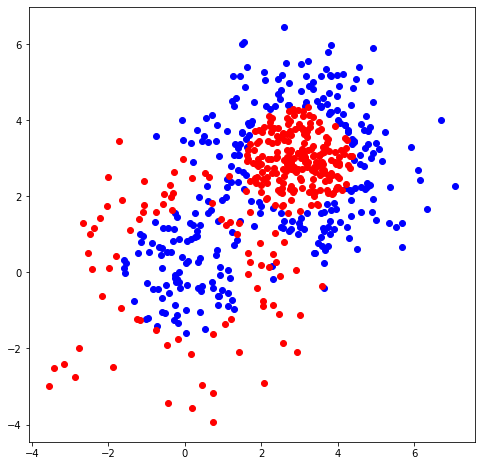

In [40]:
def gen_data(seed):
    X1, y1 = datasets.make_gaussian_quantiles(cov=2.,
                                 n_samples=300, n_features=2,
                                 n_classes=2, random_state=seed)
    X2, y2 = datasets.make_gaussian_quantiles(mean=(3, 3), cov=1.5,
                                 n_samples=700, n_features=2,
                                 n_classes=2, random_state=seed)
    X = np.concatenate((X1, X2))
    y = np.concatenate((y1, - y2 + 1))
    y = 2*y-1
    X, y = shuffle(X, y)
    return X, y

X,y = gen_data(1)
Xtest,X = np.split(X,[400])
ytest,y = np.split(y,[400])

Xblue = X[y==-1]
Xred = X[y==1]
plt.figure(figsize=(8,8))
plt.scatter(Xblue[:,0],Xblue[:,1],c='b')
plt.scatter(Xred[:,0],Xred[:,1],c='r');

In [51]:
def plot_decision_boundary(f,X,y):
    plot_step = 0.02
    x0_min, x0_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x1_min, x1_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx0, xx1 = np.meshgrid(np.arange(x0_min, x0_max, plot_step), np.arange(x1_min, x1_max, plot_step))
    yypred = f.predict(np.c_[xx0.ravel(),xx1.ravel()])
    yypred = yypred.reshape(xx0.shape)
    plt.figure()
    plt.contourf(xx0, xx1, yypred, cmap=plt.cm.Paired)
    y_pred = f.predict(X)
    Xblue_good = X[np.equal(y,-1)*np.equal(y,y_pred)]
    Xblue_bad  = X[np.equal(y,-1)*np.not_equal(y,y_pred)]
    Xred_good  = X[np.equal(y,1)*np.equal(y,y_pred)]
    Xred_bad   = X[np.equal(y,1)*np.not_equal(y,y_pred)]
    plt.scatter(Xblue_good[:,0],Xblue_good[:,1],c='b')
    plt.scatter(Xblue_bad[:,0],Xblue_bad[:,1],c='c',marker='v')
    plt.scatter(Xred_good[:,0],Xred_good[:,1],c='r')
    plt.scatter(Xred_bad[:,0],Xred_bad[:,1],c='m',marker='v')
    plt.show()

Generalization error: 0.08


<Figure size 432x288 with 0 Axes>

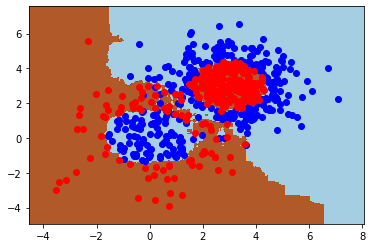

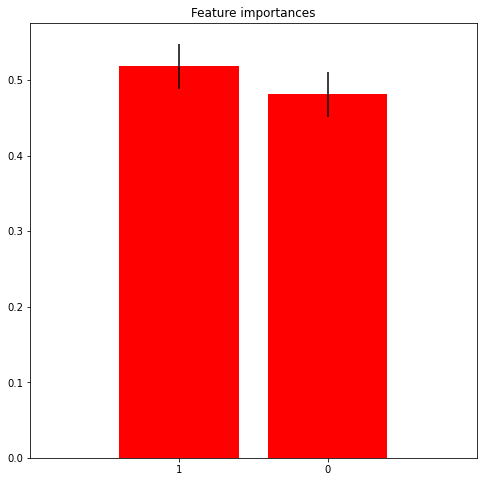

In [62]:
### Generate data
X,y = gen_data(1)
Xtest,X = np.split(X,[400])
ytest,y = np.split(y,[400])

et = ExtraTreesClassifier(n_estimators=101, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', bootstrap=False)
et.fit(X,y)

# Plot
print("Generalization error: %g"%(1.-et.score(Xtest,ytest)))
plt.figure()
plot_decision_boundary(et,X,y)

# Feature importance
importances = et.feature_importances_
std = np.std([tree.feature_importances_ for tree in et.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(8,8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

Similar to random forest algorithm, feature importance mechanism remains to be efficient for extremly randomized trees.

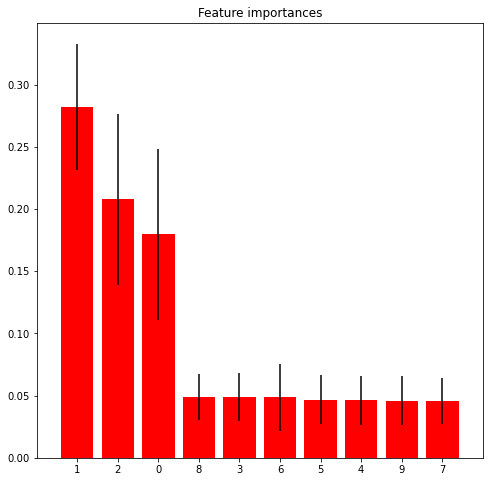

In [66]:
# A more demonstrative example
# Build a classification task using 10 features but only 3 informative ones.
X, y = datasets.make_classification(n_samples=1000,
                                    n_features=10,
                                    n_informative=3,
                                    n_redundant=0,
                                    n_repeated=0,
                                    n_classes=2,
                                    random_state=0,
                                    shuffle=False)
et = ExtraTreesClassifier(n_estimators=101, criterion='entropy')
et.fit(X,y)
importances = et.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(8,8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

# <a id="sec4"></a> 4. Examples 

In this section, two examples that we have been used during AML courses are implemented to facilitate the comparaison with other algorithms.

## <a id="sec4-1"></a> 4.1 Spam or ham?

In [1]:
import load_spam
spam_data = load_spam.spam_data_loader()
spam_data.load_data()
print("data loaded")

Xtrain, ytrain, Xtest, ytest = spam_data.split(2000)

data loaded


In [2]:
Xtrain.shape

(2000, 14279)

Let's begin with training an Extra-Trees on this tf-idf data and evaluate its generalization performance.

In [9]:
%%time
spam_ET = ExtraTreesClassifier(n_estimators=200, criterion='entropy')
spam_ET.fit(Xtrain,ytrain)

spam_ET.score(Xtest.toarray(),ytest)

# Compute cross-validation score
nb_trials = 20
score = []
for i in range(nb_trials):
    Xtrain, ytrain, Xtest, ytest = spam_data.shuffle_and_split(2000)
    spam_ET = ExtraTreesClassifier(n_estimators=200, criterion='entropy')
    spam_ET.fit(Xtrain,ytrain);
    score += [spam_ET.score(Xtest,ytest)]
    print('*', end='')
print(" done!")

print("Average generalization score:", np.mean(score))
print("Standard deviation:", np.std(score))

******************** done!
Average generalization score: 0.9725083986562151
Standard deviation: 0.005246154421273316
CPU times: user 1min 17s, sys: 1.12 s, total: 1min 18s
Wall time: 1min 23s


Then let's evaluate how the same Extra-Trees classifier trained on raw word counts performs.

In [12]:
Xtrain, ytrain, Xtest, ytest = spam_data.split(2000, feat='wordcount')

In [13]:
%%time
spam_ET = ExtraTreesClassifier(n_estimators=200, criterion='entropy')
spam_ET.fit(Xtrain,ytrain)

spam_ET.score(Xtest.toarray(),ytest)

# Compute cross-validation score
nb_trials = 20
score = []
for i in range(nb_trials):
    Xtrain, ytrain, Xtest, ytest = spam_data.shuffle_and_split(2000, feat='wordcount')
    spam_ET = ExtraTreesClassifier(n_estimators=200, criterion='entropy')
    spam_ET.fit(Xtrain,ytrain);
    score += [spam_ET.score(Xtest,ytest)]
    print('*', end='')
print(" done!")

print("Average generalization score:", np.mean(score))
print("Standard deviation:", np.std(score))

******************** done!
Average generalization score: 0.9805151175811873
Standard deviation: 0.005714378867714702
CPU times: user 1min 12s, sys: 824 ms, total: 1min 13s
Wall time: 1min 18s


## <a id="sec4-2"></a> 4.2 NIST?

In [16]:
from sklearn import datasets
%matplotlib inline
import matplotlib.pyplot as plt

digits = datasets.load_digits()
print(digits.data.shape)
print(digits.images.shape)
print(digits.target.shape)
print(digits.target_names)

X = digits.data
y = digits.target
Xtrain,Xtest = np.split(X,[1000])
ytrain,ytest = np.split(y,[1000])

def shuffle_and_split(X,y,n):
    X0,y0 = shuffle(X,y)
    Xtrain,Xtest = np.split(X0,[n])
    ytrain,ytest = np.split(y0,[n])
    return Xtrain, ytrain, Xtest, ytest

(1797, 64)
(1797, 8, 8)
(1797,)
[0 1 2 3 4 5 6 7 8 9]


In [31]:
print(Xtrain.shape)
print(ytrain.shape)
digits_et = ExtraTreesClassifier(n_estimators=200, criterion='entropy')
digits_et.fit(Xtrain,ytrain)
prediction = digits_et.predict(Xtest)
print("Generalization error:", np.sum(np.not_equal(prediction,ytest))/len(ytest) )
print("Generalization score:", digits_et.score(Xtest,ytest))
print("Confusion matrix:")
print(confusion_matrix(ytest, prediction))

(1000, 64)
(1000,)
Generalization error: 0.05269761606022585
Generalization score: 0.9473023839397742
Confusion matrix:
[[78  0  0  0  1  0  0  0  0  0]
 [ 0 74  0  1  0  1  0  0  0  4]
 [ 1  1 68  4  0  0  0  0  0  3]
 [ 0  0  0 69  0  1  0  4  5  0]
 [ 0  0  0  0 79  0  0  2  0  2]
 [ 0  0  0  0  0 80  2  0  0  0]
 [ 0  1  0  0  0  0 79  0  0  0]
 [ 0  0  0  0  0  0  0 80  0  0]
 [ 0  2  1  0  1  1  0  0 70  1]
 [ 0  0  0  1  0  2  0  0  0 78]]


In [32]:
# Compute cross-validation score
nb_trials = 20
score = []
for i in range(nb_trials):
    Xtrain, ytrain, Xtest, ytest = shuffle_and_split(X,y,1000)
    digits_et = ExtraTreesClassifier(n_estimators=200, criterion='entropy')
    digits_et.fit(Xtrain,ytrain)
    score += [digits_et.score(Xtest,ytest)]
    print('*',end='')
print(" done!")

print("Average generalization score:", np.mean(score))
print("Standard deviation:", np.std(score))

******************** done!
Average generalization score: 0.9794855708908405
Standard deviation: 0.0058080110036432325


In [28]:
# Retrain
Xtrain = X[:1000,:]
ytrain = y[:1000]
Xtest = X[1000:,:]
ytest = y[1000:]
digits_et = ExtraTreesClassifier(n_estimators=200, criterion='entropy')
digits_et.fit(Xtrain,ytrain);

<Figure size 432x288 with 0 Axes>

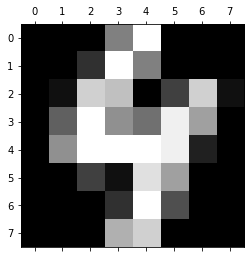

prediction on image number 1053 : [4]
correct label                : 4


In [29]:
N = 1053
plt.gray();
plt.matshow(digits.images[N]) 
plt.show() 
x = digits.data[N,:]
print("prediction on image number", N, ":", digits_et.predict([digits.data[N,:]]))
print("correct label                :", digits.target[N])

In [34]:
# Find misclassified examples
ypredict = digits_et.predict(Xtest)
misclass = np.not_equal(ypredict, ytest)
Itest = digits.images[1000:,:]
Xmisclass = Xtest[misclass,:]
ymisclass = ytest[misclass]
Imisclass = Itest[misclass,:]

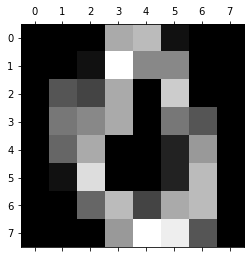

prediction on image number 1 : [3]
correct label                : 8


In [35]:
# Display misclassified examples
N = 1
plt.matshow(Imisclass[N]) 
plt.show() 
print("prediction on image number", N, ":", digits_et.predict([Xmisclass[N,:]]))
print("correct label                :", ymisclass[N])

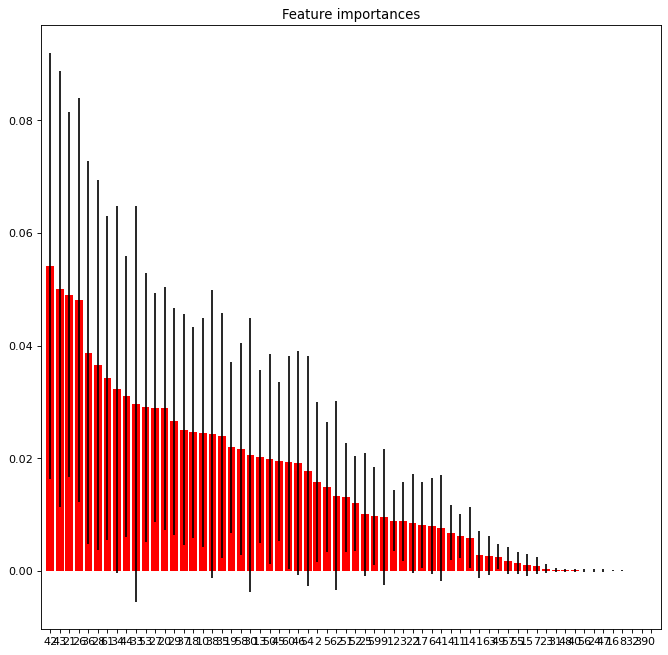

In [36]:
importances = digits_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in digits_rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
fig=plt.figure(figsize=(10,10), dpi= 80, facecolor='w', edgecolor='k')
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

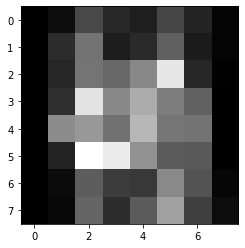

In [37]:
importances_image = importances.reshape((8,8))
plt.imshow(importances_image);